In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import io 
from PIL import Image

import sklearn.datasets 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers, models 

/home/alberto/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping, defaultdict


In [1]:
dataset = sklearn.datasets.load_files('dataset', shuffle=True)

NameError: name 'sklearn' is not defined

In [3]:
abstract_data = []
for i in range(len(dataset.data)):
    img = Image.open(io.BytesIO(dataset.data[i]))
    img = np.asarray(img)
    abstract_data.append(img)

In [4]:
shaped_data  = []
import cv2
for i in abstract_data:
    img = cv2.resize(i, (200,200))
    shaped_data.append(img)

In [5]:
X = np.array(shaped_data)
y = dataset.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

In [7]:
print(X_train.shape)
print(X_test.shape)

(81, 200, 200, 3)
(9, 200, 200, 3)


In [8]:
X_train = (X_train / 255.0).astype('float32')
X_test = (X_test / 255.0).astype('float32')

In [9]:
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [10]:
model = models.Sequential()

model.add(layers.Conv2D(64, (4,4), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(32, (4,4), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()
model.fit(X_train, y_train, epochs=20, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 197, 197, 64)      3136      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 95, 32)        32800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 70688)             0         
_________________________________________________________________
dense (Dense)                (None, 500)               35344500  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1

In [13]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Loss: {loss * 100} \nAccuracy: {accuracy * 100} ')

1/1 [==============================] - 1s 1s/step - loss: 2.1749 - accuracy: 0.6667
Loss: 217.4889087677002 
Accuracy: 66.66666865348816 


In [15]:
predictions = model.predict(X_test)
dataset.target_names

['cat', 'dogs']

In [32]:
print(np.max(predictions[1]))
predictions[1]

0.9823136


array([0.01768642, 0.9823136 ], dtype=float32)

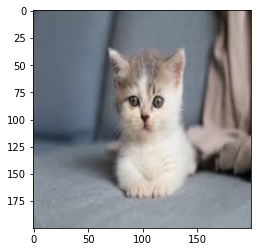

In [33]:
plt.imshow(X_test[1])

Hello world!


False

This is true


In [54]:
condition

True